# NYC's COVID-19 cases over time

**Data source:** New York City Health Department's [COVID-19 Daily Data Summary](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf)

## 0. Import dependencies

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read data

In [2]:
update_str = 'as reported by NYC Health on March 26, 2020, 5:00 pm'
source_str = 'Data: nyc.gov/coronavirus - Plot: carlos-afonso.github.io/COVID-19'
    
data_file = '../data/nyc-health-daily-updates/cases/nyc-covid-19-cases-over-time.csv'

df = pd.read_csv(data_file)
df

,date,total_cases,new_cases
0,2020-03-01,1,1
1,2020-03-02,1,0
2,2020-03-03,2,1
3,2020-03-04,2,0
4,2020-03-05,4,2
5,2020-03-06,7,3
6,2020-03-07,12,5
7,2020-03-08,14,2
8,2020-03-09,25,11
9,2020-03-10,32,7


## 2. Define date labels

In [3]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    # Formats: "%#d\n%b", "%b %#d", "%#d\n%b\n%Y"
    first_label = dates[0].strftime("%#d\n%b")
    last_label = dates[len(dates)-1].strftime("%#d\n%b")
    labels = [first_label]
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        if dates[i].month != dates[i-1].month:
            label = dates[i].strftime("%#d\n%b")
        labels.append(label)
    labels.append(last_label)
    return labels

df['date_obj'] = df['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

df['date_label'] = date_labels(df['date_obj'])

df

,date,total_cases,new_cases,date_obj,date_label
0,2020-03-01,1,1,2020-03-01,1\nMar
1,2020-03-02,1,0,2020-03-02,2
2,2020-03-03,2,1,2020-03-03,3
3,2020-03-04,2,0,2020-03-04,4
4,2020-03-05,4,2,2020-03-05,5
5,2020-03-06,7,3,2020-03-06,6
6,2020-03-07,12,5,2020-03-07,7
7,2020-03-08,14,2,2020-03-08,8
8,2020-03-09,25,11,2020-03-09,9
9,2020-03-10,32,7,2020-03-10,10


## 3. Total and New cases over time

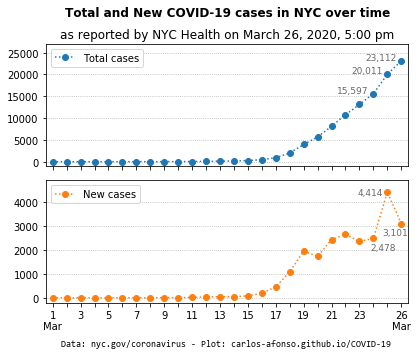

In [4]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 5), sharex=True)

ax1.plot(df['date_label'], df['total_cases'], 'o:', color='C0', label='Total cases')
n1 = 3
for xy in zip(range(len(df)-n1, len(df)), df['total_cases'].iloc[-n1:]):
    ax1.annotate('{:,}'.format(xy[1]), xy=xy, xytext=(-5, 1), textcoords='offset points', ha='right', color='dimgray', fontsize=9)
ax1.set_xlim(-0.5, len(df)-0.5)
ax1.set_ylim(-1000, 27000)
ax1.grid(axis='y', linestyle=':')
ax1.legend(loc='upper left')

ax2.plot(df['date_label'], df['new_cases'], 'o:', color='C1', label='New cases')
n2 = 3
xytext_list = [(-3, -12), (-30, -3), (-19, -12)]
for z in zip(range(len(df)-n2, len(df)), df['new_cases'].iloc[-n2:], xytext_list):
    ax2.annotate('{:,}'.format(z[1]), xy=z[0:2], xytext=z[2], textcoords='offset points', color='dimgray', fontsize=9)
ax2.set_ylim(-200, 4900)
ax2.grid(axis='y', linestyle=':')
ax2.legend(loc='upper left')

plt.suptitle('Total and New COVID-19 cases in NYC over time', x=0.535, fontweight='bold')
ax1.set_title(update_str)

ax2.text(0.6, -2000, source_str, fontfamily='Consolas', fontsize=9)

x_labels = [df['date_label'].iloc[i] if i%2==0 else '' for i in range(len(df))]
if len(df)%2 == 0:
    x_labels[-2] = ''
    x_labels[-1] = df['date_label'].iloc[-1]

ax1.set_xticklabels(x_labels)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [5]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-total-and-new-cases-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 5. New cases over time

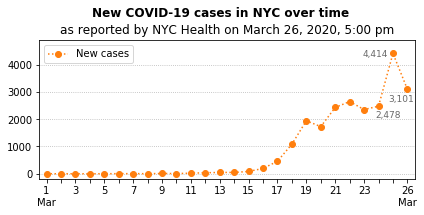

In [6]:
fig = plt.figure(figsize=(6, 3))

plt.plot(df['date_label'], df['new_cases'], 'o:', color='C1', label='New cases')

n2 = 3
xytext_list = [(-3, -12), (-30, -3), (-19, -12)]
for z in zip(range(len(df)-n2, len(df)), df['new_cases'].iloc[-n2:], xytext_list):
    plt.annotate('{:,}'.format(z[1]), xy=z[0:2], xytext=z[2], textcoords='offset points', color='dimgray', fontsize=9)

x_labels = [df['date_label'].iloc[i] if i%2==0 else '' for i in range(len(df))]
if len(df)%2 == 0:
    x_labels[-2] = ''
    x_labels[-1] = df['date_label'].iloc[-1]

plt.xticks(range(len(df)), x_labels)

plt.xlim(-0.5, len(df)-0.5)
plt.ylim(-200, 4900)

plt.grid(axis='y', linestyle=':')

plt.suptitle('New COVID-19 cases in NYC over time', x=0.52, fontweight='bold')
plt.title(update_str)

#plt.text(0.7, -1900, source_str, fontfamily='Consolas', fontsize=9)

plt.legend(loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-new-cases-over-time'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## A. Appendix

Other plots (currently not being used).

### A.1. Total cases over time

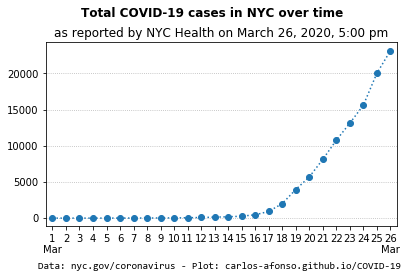

In [8]:
fig = plt.figure()

plt.plot(df['date_label'], df['total_cases'], 'o:', color='C0')

plt.xlim(-0.5, len(df)-0.5)
#plt.ylim(-300, 9000)

plt.grid(axis='y', linestyle=':')

plt.suptitle('Total COVID-19 cases in NYC over time', fontweight='bold')
plt.title(update_str)

plt.text(-1.1, -7000, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()